In [153]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import datetime
from sklearn.linear_model import SGDRegressor

In [154]:
colsRemove = ['Title', 'Synopsis', 'Genre', 'Ratings'];

bookType = {'Paperback': 1,
            'Hardcover': 10}; #function price hardcover > paperback

book_categs_tokenized = ['Mangas', 'Comics', 'True Accounts', 'Biographies, Diaries', 'Sports', 'Humour', 'Adventure', 'Action', 'Politics', 'Photography', 'Arts, Film'
               'Writing', 'Language, Linguistics', 'Romance', 'Digital Media', 'Computing, Internet', 'Mystery', 'Crime, Thriller'];

book_categs = ['Crime, Thriller & Mystery', 'Computing, Internet & Digital Media',
 'Romance', 'Language, Linguistics & Writing', 'Arts, Film & Photography',
 'Politics', 'Action & Adventure', 'Humour' 'Sports',
 'Biographies, Diaries & True Accounts', 'Comics & Mangas'];

AuthorPrice = {};
AuthorCount = {};

AuthorMeanPrice = {};

AuthorPrice_if_not_existent = 0;


In [155]:

def review_calc(s):
    #print(s);
    rating = float(s.split(' ')[0]);
    #print(rating)
    return (rating / 5.0);

def make_launch_date(s):
    date = s.split('-')[1][1:];
    print(date);
    #date_in_seconds = (datetime.datetime(2009, 10, 21, 0, 0) - datetime.datetime(1970,1,1)).total_seconds()


def fix_category(r):
    for cat in book_categs_tokenized:
        if(cat in r['BookCategory']): r[cat] = 1;
    return r;

def calcAuthPrice(r):
    global AuthorCount, AuthorPrice;
    

    
    auth = r['Author'];
    price = r['Price'];

    if(auth == 'Chris Kuzneski'):
        print("price: ", r["Price"]);

    if(auth not in AuthorPrice): AuthorPrice[auth] = 0;
    if(auth not in AuthorCount): AuthorCount[auth] = 0;
    AuthorCount[auth] += 1;
    AuthorPrice[auth] += price;
    return r;   

def aplicAuthMean(r):
    global AuthorCount, AuthorPrice, AuthorMeanPrice, AuthorPrice_if_not_existent;
    r['AuthorPrice'] = AuthorPrice[r['Author']] / AuthorCount[r['Author']];
    if(r['Author'] not in AuthorMeanPrice): AuthorMeanPrice[r['Author']] = 0;
    AuthorMeanPrice[r['Author']] = r['AuthorPrice'];
    AuthorPrice_if_not_existent += r['AuthorPrice'];
    return r;

def addMeanToData(r):
    global AuthorCount, AuthorPrice, AuthorMeanPrice, AuthorPrice_if_not_existent;
    if(r['Author'] in AuthorMeanPrice): r['AuthorPrice'] = AuthorMeanPrice[r['Author']];
    else: r['AuthorPrice'] = AuthorPrice_if_not_existent;
    return r;

def data_resolve(df):
    df['Edition_type'] = df['Edition'].apply(lambda x: 1 if 'Paperback' in x else 2);
    df['Reviews'] = df['Reviews'].apply(lambda x: review_calc(x));

    df = df.apply(fix_category, axis = 1);
    df = df.apply(calcAuthPrice, axis = 1);
    df = df.apply(aplicAuthMean, axis = 1);
    
    
    
    #df['Ratings'] = df['Ratings'].apply(lambda x: int(x.split(' ')[0]) if ',' in x else 1);

    df.drop(columns=colsRemove, inplace=True);
    df.drop(columns='Edition', inplace=True);
    df.drop(columns='BookCategory', inplace=True);
    df.drop(columns='Author', inplace=True);
    
    return df;

def data_resolve_for_real_data(df):
    df['Edition_type'] = df['Edition'].apply(lambda x: 1 if 'Paperback' in x else 2);
    df['Reviews'] = df['Reviews'].apply(lambda x: review_calc(x));

    df = df.apply(fix_category, axis = 1);
    #df = df.apply(calcAuthPrice, axis = 1);
    #df = df.apply(aplicAuthMean, axis = 1);
    
    
    
    #df['Ratings'] = df['Ratings'].apply(lambda x: int(x.split(' ')[0]) if ',' in x else 1);

    df.drop(columns=colsRemove, inplace=True);
    df.drop(columns='Edition', inplace=True);
    df.drop(columns='BookCategory', inplace=True);
    #df.drop(columns='Author', inplace=True);
    
    return df;

In [156]:
features_and_labels = pd.read_excel('Data_Train.xlsx')

In [157]:
for ct in book_categs_tokenized:
    features_and_labels[ct] = 0;

print(features_and_labels['Author'].unique())



features_and_labels = data_resolve(features_and_labels);

display(features_and_labels);


['Chris Kuzneski' 'Arun Khopkar' 'Thomas Hobbes' ... 'Saba Naqvi'
 'Tom Phillips' 'Stephenie Meyer']
price:  220.0
price:  329.0
price:  110.0
price:  249.0


,Reviews,Price,Mangas,Comics,True Accounts,"Biographies, Diaries",Sports,Humour,Adventure,Action,...,Photography,"Arts, FilmWriting","Language, Linguistics",Romance,Digital Media,"Computing, Internet",Mystery,"Crime, Thriller",Edition_type,AuthorPrice
0,0.80,220.00,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,227.00000
1,0.78,202.93,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,202.93000
2,0.96,299.00,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,299.00000
3,0.82,180.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,241.17087
4,1.00,965.62,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,965.62000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,1.00,322.00,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,322.00000
6233,0.66,421.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,421.00000
6234,0.76,399.00,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,449.00000
6235,0.70,319.00,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,321.58000


<bound method DataFrame.to_string of       Reviews  Mangas  Comics  True Accounts  Biographies, Diaries  Sports  \
5440     0.94       0       0              0                     0       0   
2359     0.90       1       1              0                     0       0   
2578     0.92       0       0              1                     1       0   
4557     0.90       1       1              0                     0       0   
4329     0.60       0       0              0                     0       1   
...       ...     ...     ...            ...                   ...     ...   
158      0.80       0       0              0                     0       0   
4792     0.80       0       0              0                     0       0   
461      0.80       0       0              0                     0       0   
5288     0.88       0       0              0                     0       0   
2229     0.90       0       0              1                     1       0   

      Humour  Adventure  A

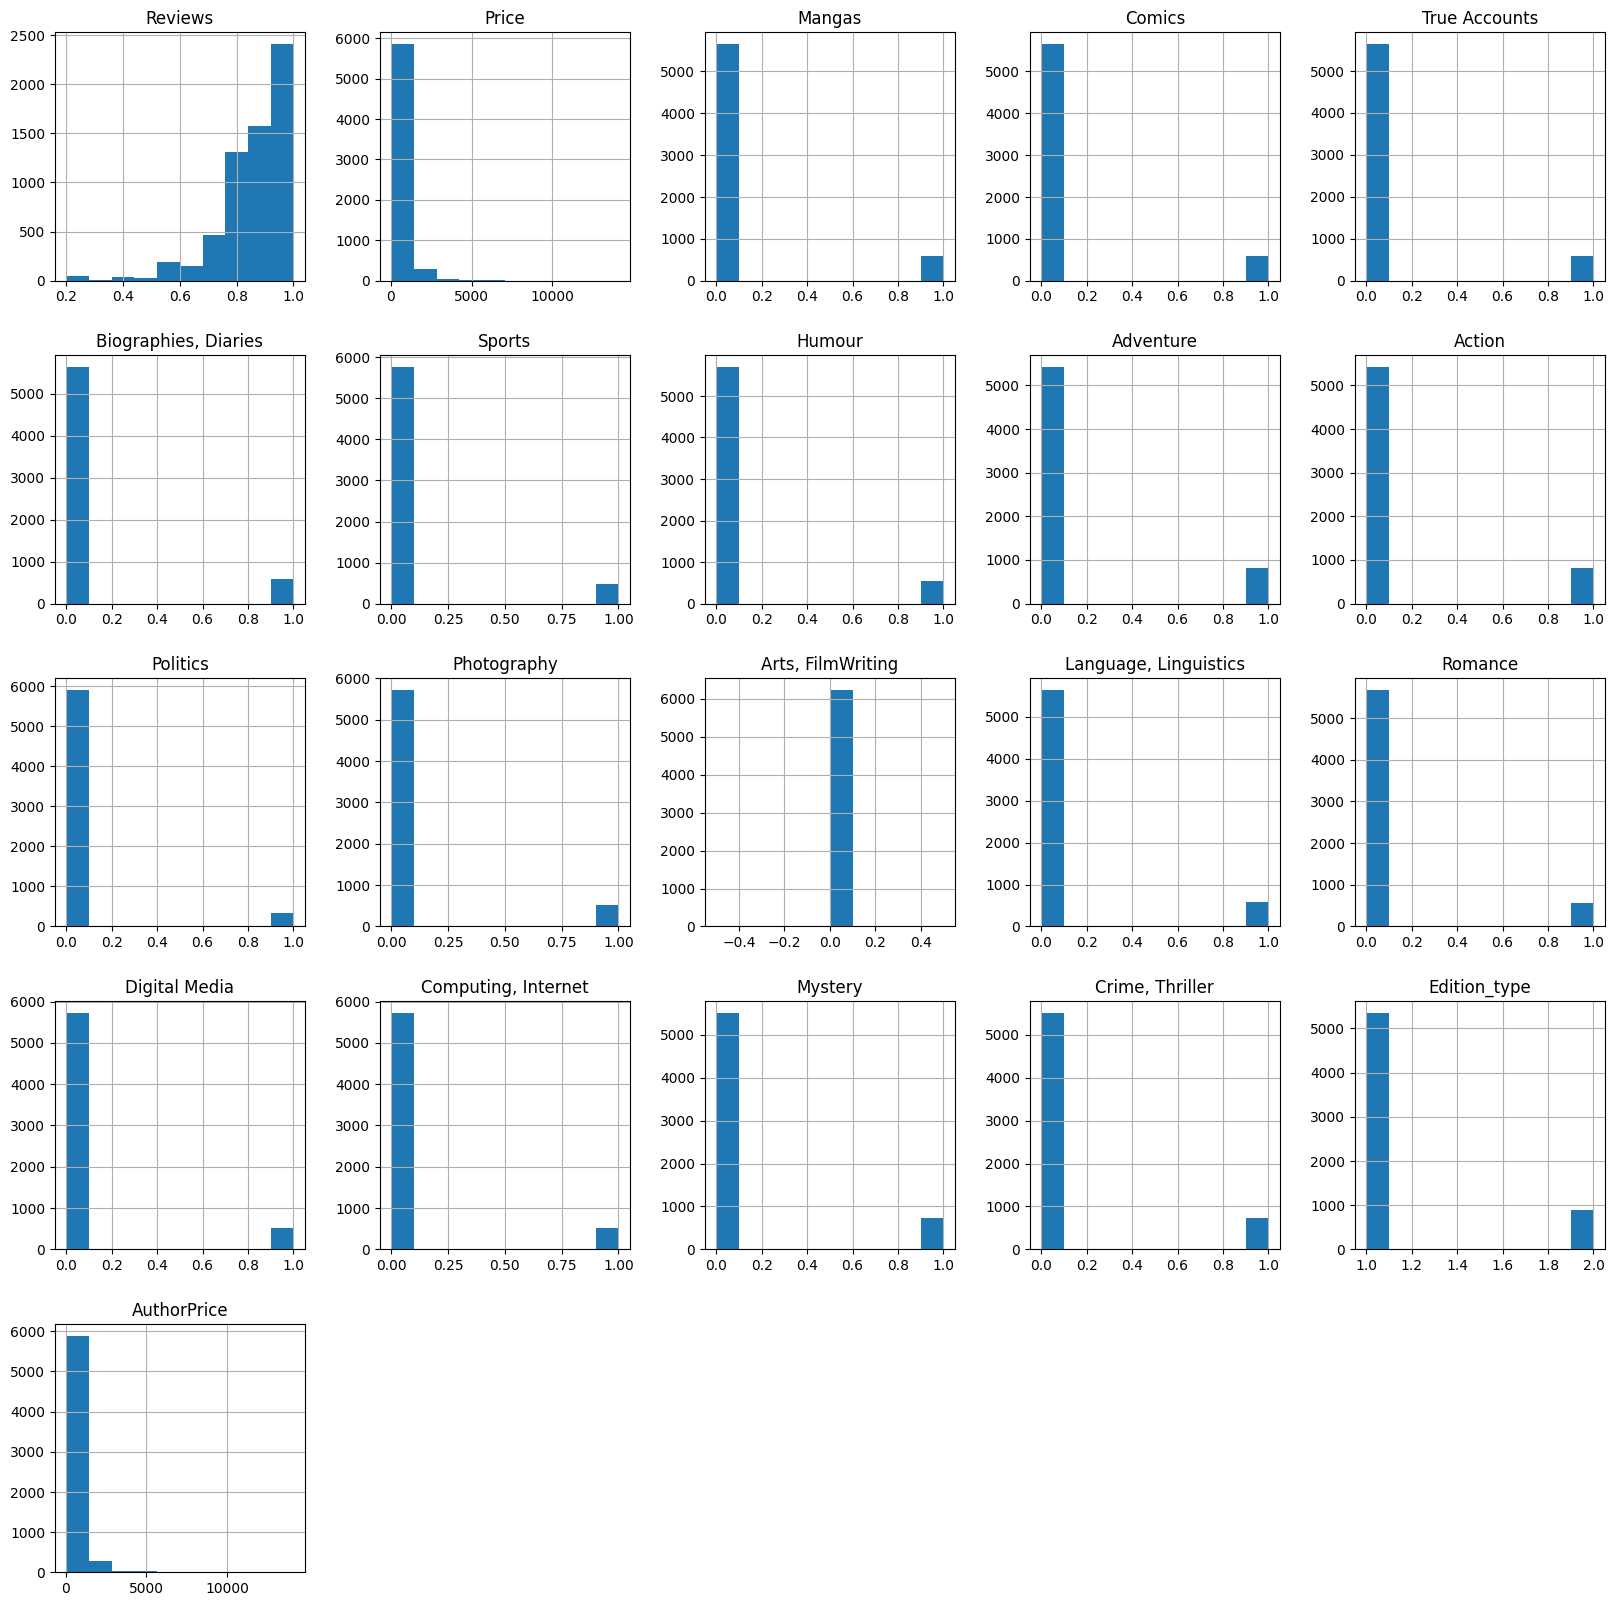

In [158]:
features_and_labels_train, features_and_labels_test = train_test_split(features_and_labels, test_size=0.5);

features_train = features_and_labels_train.drop(columns=["Price"]);
labels_train = features_and_labels_train["Price"];

features_test = features_and_labels_test.drop(columns=["Price"]);
labels_test = features_and_labels_test["Price"];

features_and_labels.hist(figsize=(20, 20));

print(features_train.to_string);

In [159]:
model = linear_model.LinearRegression().fit(features_train, labels_train);

In [160]:
pred = model.predict(features_test);

print(r2_score(labels_test, pred));

0.8890625751467734


In [161]:
realData = pd.read_excel('Data_Test.xlsx');

for cat in book_categs_tokenized:
    realData[cat] = 0;

AuthorPrice_if_not_existent /= len(AuthorPrice);
realData = data_resolve_for_real_data(realData);

realData = realData.apply(addMeanToData, axis = 1);
realData.drop(columns='Author', inplace=True);

display(realData)

ans = pd.DataFrame(model.predict(realData));

display(ans);
ans.to_csv('ans.csv');

,Reviews,Mangas,Comics,True Accounts,"Biographies, Diaries",Sports,Humour,Adventure,Action,Politics,Photography,"Arts, FilmWriting","Language, Linguistics",Romance,Digital Media,"Computing, Internet",Mystery,"Crime, Thriller",Edition_type,AuthorPrice
0,0.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,325.705000
1,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,950.566127
2,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,239.166667
3,0.82,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,950.566127
4,0.88,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,476.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1821.000000
1556,0.72,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,185.000000
1557,0.80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,320.000000
1558,0.70,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,950.566127


,0
0,321.213387
1,952.847584
2,242.801642
3,939.503796
4,467.156951
...,...
1555,1825.119000
1556,146.165558
1557,296.083894
1558,911.865201


In [162]:
outp_ex = pd.read_excel('Sample_Submission.xlsx');
outp_ex.to_csv('out.csv');